In [1]:
#!pip install nltk
#!pip install scikit-learn
#!pip install pandas
#!pip install catboost
#!pip install xgboost

<h4>Importing required packages</h4>

In [3]:
import pandas as pd
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ps = SnowballStemmer(language = "english")
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /config/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<h5>Read data</h5>

In [4]:
df = pd.read_csv("/config/workspace/emotions/data/data.csv")


<h4>Function for cleaning text data</h4>

In [5]:
def clean_text(text):
    result = re.sub("[^a-zA-Z]"," ",text)
    result = result.lower()
    result = result.split()
    result = [ps.stem(word) for word in result if word not in set(stopwords.words('english'))]
    result = " ".join(result)
    return result

In [6]:
df['cleaned_text'] = df["text"].apply(clean_text)

In [7]:
df.head()

,text,emotions,cleaned_text
0,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
1,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
2,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
3,i am feeling grouchy,anger,feel grouchi
4,ive been feeling a little burdened lately wasn...,sadness,ive feel littl burden late wasnt sure


<h4>text to numeric</h4>

In [8]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
le.fit(df['emotions'])
y = le.transform(df['emotions'])



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 2500)
xtf = tf.fit_transform(df["cleaned_text"]).toarray()
xtf.shape
 

 

(17998, 2500)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
xcv = cv.fit_transform(df['cleaned_text']).toarray()
xcv.shape



(17998, 2500)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtf,y,test_size = 0.3,random_state = 42)


In [12]:
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def evaluate_model(true,predicted):
    accuracy = accuracy_score(true,predicted)
    precision = precision_score(true,predicted ,average = "macro")
    f1 = f1_score(true,predicted ,average = "macro")
    return accuracy,precision,f1

models = {
    "LogisticRegression" : LogisticRegression(),
    "RidgeClassifier" : RidgeClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "XgbClassifier" : XGBClassifier(),
    "CatBoostClassifier" : CatBoostClassifier()
}


In [13]:
mod = RidgeClassifier()
#Lasso()
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
y_pred
 

array([0, 1, 0, ..., 2, 2, 0])

In [14]:
model_list = []
accuracy_list = []
for  i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
  

    model_train_accuracy,model_train_precision,model_train_f1 = evaluate_model(y_train,y_train_pred)
    model_test_accuracy,model_test_precision,model_test_f1 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set :")
    print("Accuracy score : ",model_train_accuracy)
    print("Precision score :",model_train_precision)
    print("F1_score :",model_train_f1)
    print("*" * 25)
    print("Model performance for testing set :")
    
    print("Accuracy score : ",model_test_accuracy)
    print("Precision score :",model_test_precision)
    print("F1_score :",model_test_f1)
    accuracy_list.append(model_test_accuracy)
    print("=" * 36)
    print("\n")


LogisticRegression
Model performance for training set :
Accuracy score :  0.9099857120177806
Precision score : 0.9167291807674184
F1_score : 0.8762460793191512
*************************
Model performance for testing set :
Accuracy score :  0.8305555555555556
Precision score : 0.8259274400671556
F1_score : 0.7683416860557699


RidgeClassifier
Model performance for training set :
Accuracy score :  0.9291157326559771
Precision score : 0.924868440911708
F1_score : 0.9096768384488031
*************************
Model performance for testing set :
Accuracy score :  0.8548148148148148
Precision score : 0.8346717713463262
F1_score : 0.8158063623391115


KNeighborsClassifier
Model performance for training set :
Accuracy score :  0.8167169391966979
Precision score : 0.849730865059338
F1_score : 0.7590735568220744
*************************
Model performance for testing set :
Accuracy score :  0.695925925925926
Precision score : 0.7013102705551973
F1_score : 0.6076519683072125


DecisionTreeClassifi

In [16]:
my_model = RidgeClassifier()
my_model.fit(x_train,y_train)
my_pred = my_model.predict(x_test)
acc_score = accuracy_score(y_test,my_pred)
acc_score

0.8548148148148148

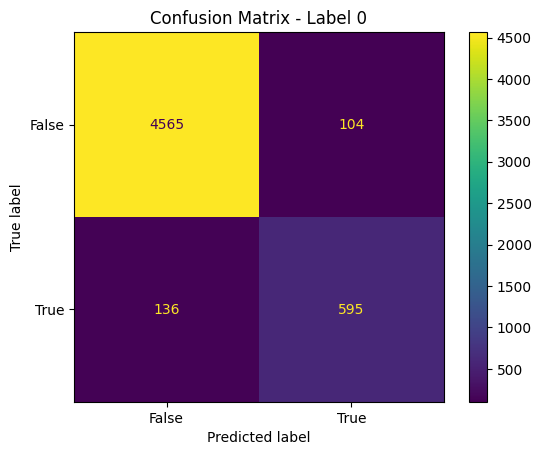

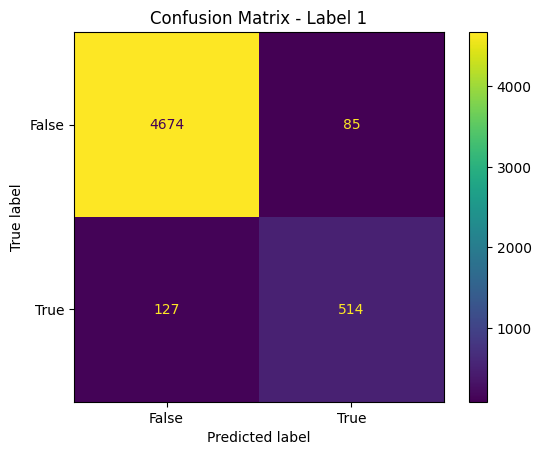

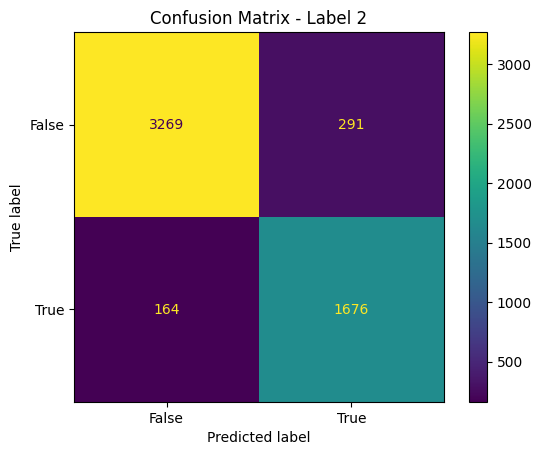

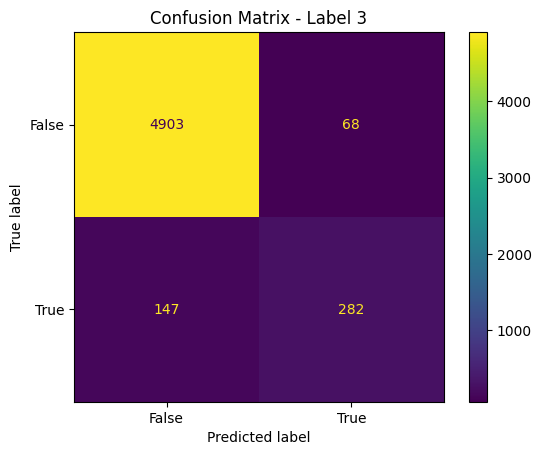

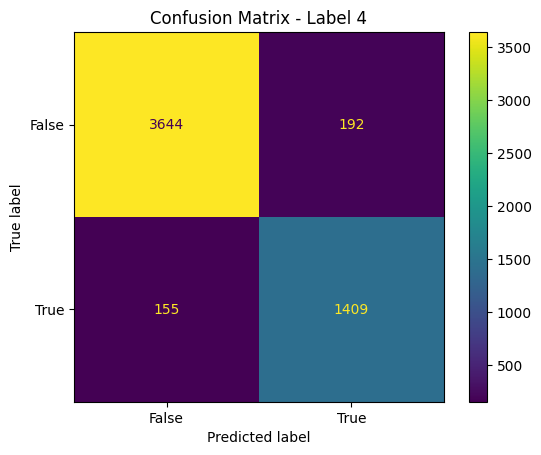

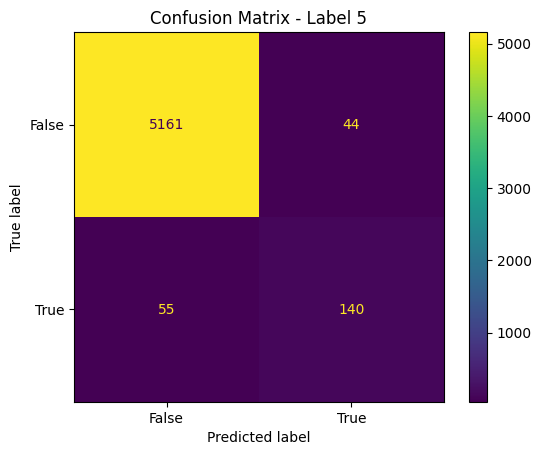

In [38]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels =  ["0","1","2","3","4","5"]
confusion_matrices = multilabel_confusion_matrix(y_test, my_pred, labels=labels)

 
for i, label in enumerate(labels):
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[i], display_labels=[False, True])
    cm_display.plot()
    plt.title(f"Confusion Matrix - Label {label}")
    plt.show()
